In [4]:
# general packages imports
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [5]:
# local utils imports
from utils.model_utils import UNET, predict
from utils.local_utils import get_image_mask

# got issue with exporting get_image to .ipynb,
# so defining it here 
def get_image(folder, img_name):
    img = cv2.imread(os.path.join(folder, img_name))
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [3]:
# setup model with the latest checkpoint
model = UNET(1).model
latest = tf.train.latest_checkpoint('./weights')
model.load_weights(latest)

In [6]:
# load both train and val images
df = pd.read_csv('data/processed_df.csv')
train_ids = pd.read_csv('data/cleared_train_ids.csv')
val_ids = pd.read_csv('data/cleared_val_ids.csv')
img_folder = 'data/train_v2'

1/1 [==============================] - 0s 240ms/step


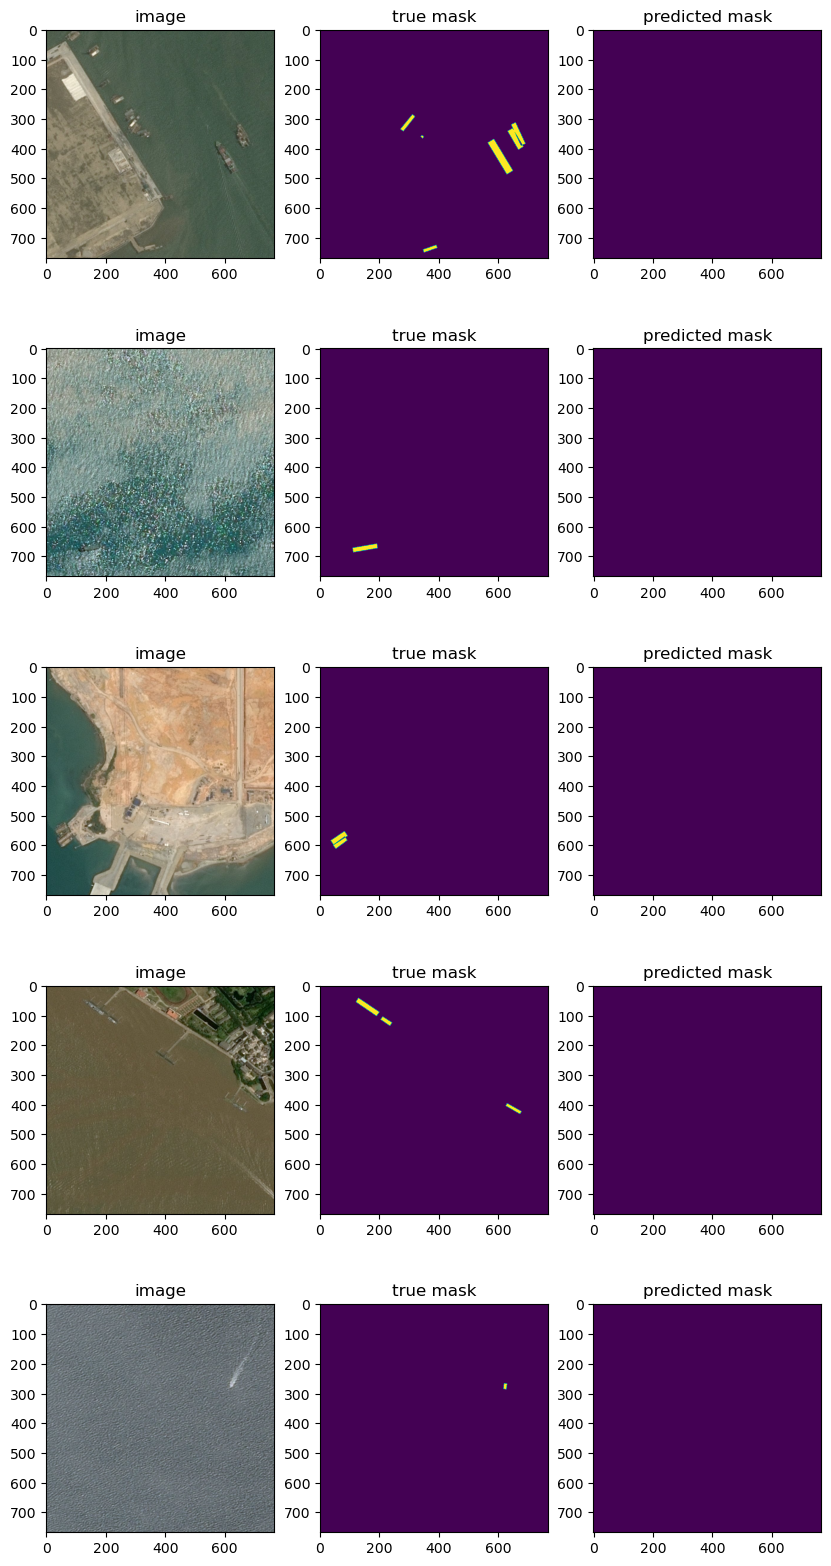

In [9]:
number_of_images=5
random_state=2

_,ax = plt.subplots(number_of_images, 3, figsize=(10, 4 * number_of_images))
i = 0
for image_name in val_ids.sample(number_of_images, random_state=random_state).ImageId.to_numpy():
    img = get_image(img_folder, image_name)
    mask = get_image_mask(image_name, df)
    ax[i, 0].imshow(img)
    ax[i, 0].set_title('image')
    ax[i, 1].imshow(mask)
    ax[i, 1].set_title('true mask')

    pred_mask = predict(img, model)
    ax[i, 2].imshow(pred_mask)
    ax[i, 2].set_title('predicted mask')
    i += 1

plt.show()

As we can see the trained model is not segmenting anything. This is most likely due to the fact that the model was hardly trained (a dozen epochs were run on a small batch from the general dataset).